In [1]:
import pandas as pd

df_train = pd.read_csv("./dataset/mnist_train.csv")
df_test = pd.read_csv("./dataset/mnist_test.csv")

In [2]:
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [4]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import numpy as np

np.sqrt(784)

28.0

In [7]:
X_train = np.array(df_train.iloc[:, 1:])
y_train = np.array(df_train['label'])

X_test = np.array(df_test.iloc[:, 1:])
y_test = np.array(df_test['label'])

In [8]:
import random

samples = random.choices(population=range(0, 60000), k=16)
samples

[12147,
 39364,
 49549,
 362,
 56186,
 27013,
 4853,
 53030,
 52791,
 23938,
 1211,
 38767,
 41032,
 10299,
 17367,
 44002]

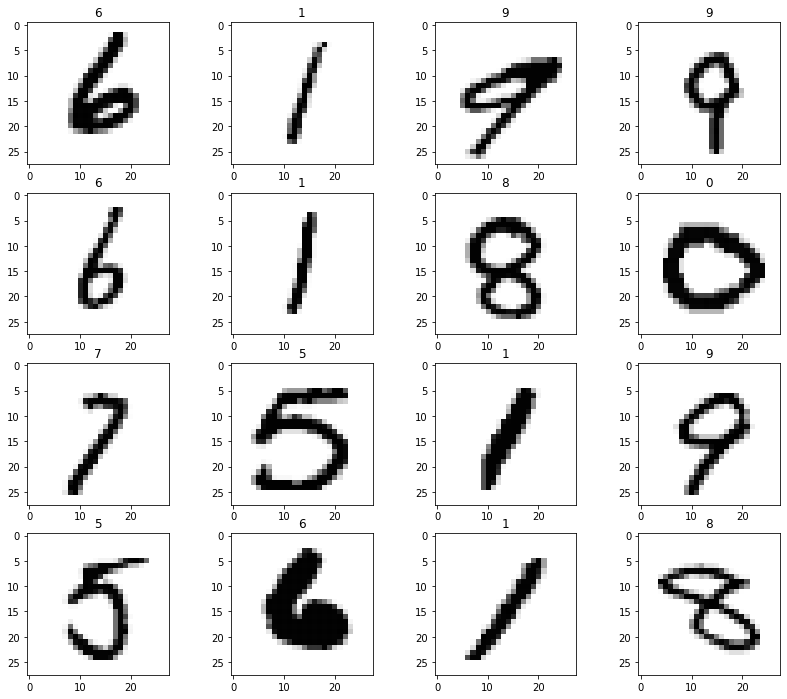

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_train[n].reshape(28,28), cmap='Greys')
    plt.title(y_train[n])

plt.show()


In [12]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
from sklearn.metrics import accuracy_score

pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.9688

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipe = Pipeline([
    ('pca', PCA()),
    ('clf', KNeighborsClassifier()),
])

param = {
    'pca__n_components': [2, 5, 10],
    'clf__n_neighbors': [5, 10, 15]
}

In [17]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)
grid = GridSearchCV(pipe, param, cv=kf, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=13, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'clf__n_neighbors': [5, 10, 15],
                         'pca__n_components': [2, 5, 10]},
             verbose=1)

In [18]:
grid.best_score_

0.9311166666666667

In [19]:
grid.best_params_

{'clf__n_neighbors': 10, 'pca__n_components': 10}

In [20]:
pred = grid.best_estimator_.predict(X_test)
accuracy_score(y_test, pred)

0.9288

In [21]:
def results(y_pred, y_test):
    from sklearn.metrics import classification_report, confusion_matrix
    print(classification_report(y_test, y_pred))

results(grid.predict(X_train), y_train)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5923
           1       0.98      0.99      0.98      6742
           2       0.96      0.96      0.96      5958
           3       0.94      0.90      0.92      6131
           4       0.94      0.93      0.93      5842
           5       0.93      0.94      0.93      5421
           6       0.96      0.98      0.97      5918
           7       0.96      0.95      0.96      6265
           8       0.92      0.91      0.91      5851
           9       0.90      0.91      0.90      5949

    accuracy                           0.95     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.95      0.94     60000



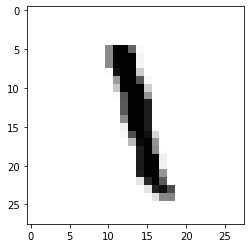

Ans :  [1]
Real :  1


In [23]:
n = 700
plt.imshow(X_test[n].reshape(28, 28), cmap='Greys')
plt.show()

print('Ans : ', grid.best_estimator_.predict(X_test[n].reshape(1, 784)))
print('Real : ', y_test[n])

In [25]:
preds = grid.best_estimator_.predict(X_test)
preds

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [26]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [30]:
wrong_results = X_test[y_test!=preds]
samples = random.choices(population=range(0, wrong_results.shape[0]), k=16)

C:\Users\sanghui\miniconda3\envs\ds_study\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\sanghui\miniconda3\envs\ds_study\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\sanghui\miniconda3\envs\ds_study\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\sanghui\miniconda3\envs\ds_study\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\sanghui\miniconda3\envs\ds_study\lib\site-packages\matplotl

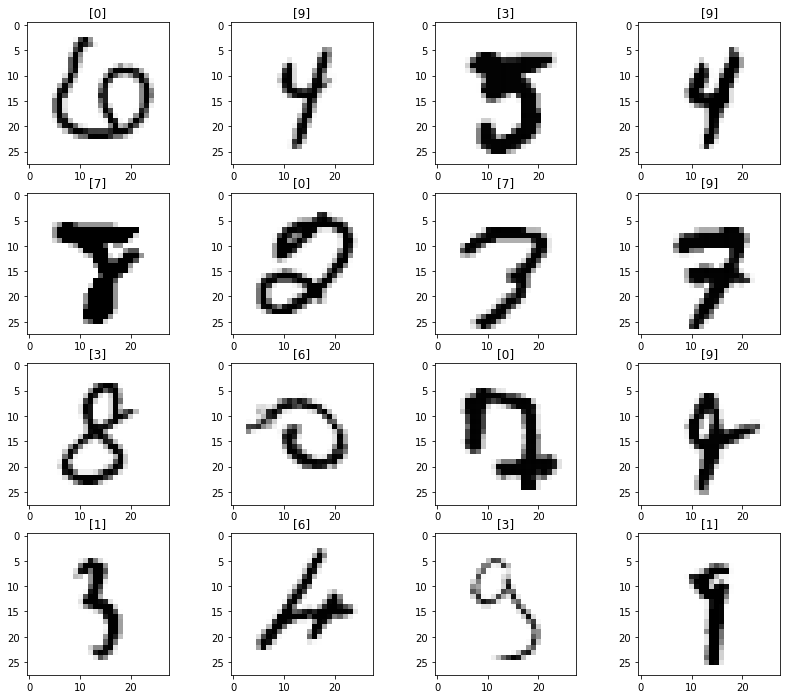

In [32]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(wrong_results[n].reshape(28,28), cmap='Greys')
    pred_digit = grid.best_estimator_.predict(wrong_results[n].reshape(1, 784))
    plt.title(pred_digit)
plt.show()